In [0]:
import pandas as pd  
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import pickle
from sklearn.svm import SVC
import random
from sklearn.feature_selection import RFE
import re
import nltk
import seaborn as sns

In [0]:
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
train1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/trainn.csv", delimiter = ',')
test1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/testn.csv", delimiter = ',')
print (" data read successfully!")

 data read successfully!


In [5]:
train2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/trainn.csv", delimiter = ',')
test2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/testn.csv", delimiter = ',')
print (" data read successfully!")

 data read successfully!


In [6]:
train3 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/trainn.csv", delimiter = ',')
test3 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/testn.csv", delimiter = ',')
print (" data read successfully!")

 data read successfully!


In [7]:
train4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/trainn.csv", delimiter = ',')
test4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/testn.csv", delimiter = ',')
print (" data read successfully!")
train5 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/trainn.csv", delimiter = ',')
test5 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/testn.csv", delimiter = ',')
print (" data read successfully!")
train6 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/trainn.csv", delimiter = ',')
test6 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/testn.csv", delimiter = ',')
print (" data read successfully!")

 data read successfully!
 data read successfully!
 data read successfully!


In [8]:
train1.columns

Index(['Unnamed: 0', 'Donor City', 'Donor State', 'Donor Is Teacher',
       'Teacher Project Posted Sequence', 'Project Type',
       'Project Grade Level Category', 'Project Cost', 'Donated_y_n',
       'School Metro Type', 'School Percentage Free Lunch', 'School State',
       'School City', 'Project_res_total_cost', 'Donor_vs_school_state',
       'Donor_vs_school_city', 'Project_posted_month',
       'Project_posted_day_of_month', 'Num_hist_donations',
       'Days_since_last_donation', 'Avg_days_between_donations',
       'Avg_donations_per_proj', 'Interest_in_optional',
       'Total_interest_in_cat', 'Total_interest_in_subcat', 'Interest_in_res',
       'Interest_in_grade', 'Interest_in_proj_type', 'Interest_in_metro',
       'Interest_in_county', 'Interest_in_district', 'Interest_in_zip',
       'Donation_month', 'Interest_in_month', 'Total_project_interest',
       'Donor Cluster', 'School Cluster', 'Project Cluster', 'Distance',
       'School Population', 'School Population

In [9]:
train1.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
test1.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
train2.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
test2.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
train3.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
test3.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
train4.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
test4.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
train5.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
test5.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
train6.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
test6.drop(columns=['Unnamed: 0','Donor City','Donor State','School City','School State'],inplace=True)
train1.head()

,Donor Is Teacher,Teacher Project Posted Sequence,Project Type,Project Grade Level Category,Project Cost,Donated_y_n,School Metro Type,School Percentage Free Lunch,Project_res_total_cost,Donor_vs_school_state,Donor_vs_school_city,Project_posted_month,Project_posted_day_of_month,Num_hist_donations,Days_since_last_donation,Avg_days_between_donations,Avg_donations_per_proj,Interest_in_optional,Total_interest_in_cat,Total_interest_in_subcat,Interest_in_res,Interest_in_grade,Interest_in_proj_type,Interest_in_metro,Interest_in_county,Interest_in_district,Interest_in_zip,Donation_month,Interest_in_month,Total_project_interest,Donor Cluster,School Cluster,Project Cluster,Distance,School Population,School Population Density,School Occupied Housing Units,School Median Home Value,School Median Household Income,Donor Population,Donor Population Density,Donor Occupied Housing Units,Donor Median Home Value,Donor Median Household Income
0,0,1,2,4.0,0.042884,Y,3.0,0.78,0.051726,1,0,5,11,3,1090.268738,168.435355,1.0,1.0,0.333333,0.333333,0.666667,1.000000,1.0,1.000,1.000000,1.000000,1.000000,5.0,0.333333,7.333333,3,3,4,0.000631,0.208355,0.943804,0.440799,0.636571,0.408289,0.504823,1.000000,0.932068,0.658269,0.490043
1,0,6,2,3.0,0.009383,Y,3.0,0.93,0.015379,1,0,2,20,6,99.051470,15.328160,1.0,1.0,0.500000,0.500000,1.000000,0.166667,1.0,1.000,0.833333,0.833333,0.166667,2.0,0.333333,6.000000,3,3,0,0.001504,0.055214,0.190795,0.139461,0.130909,0.160692,0.065068,0.203468,0.175105,0.233739,0.423750
2,0,1,2,3.0,0.013547,Y,3.0,0.54,0.018113,1,1,9,11,8,219.528519,130.487542,1.0,1.0,0.750000,0.250000,0.375000,0.125000,1.0,0.875,0.750000,0.750000,0.125000,9.0,0.125000,5.000000,3,3,0,NaN,0.226064,0.175677,0.353437,0.228711,0.229898,0.238592,0.178053,0.370477,0.269543,0.259561
3,0,1,2,4.0,0.067094,Y,3.0,0.83,0.000000,1,0,2,28,3,909.485903,142.415355,1.0,1.0,1.000000,1.000000,0.333333,0.333333,1.0,1.000,0.666667,1.000000,0.333333,NaN,NaN,6.666667,3,3,4,NaN,0.226064,0.175677,0.353437,0.228711,0.229898,0.238592,0.178053,0.370477,0.269543,0.259561
4,0,1,2,2.0,0.021486,Y,0.0,0.83,0.028510,1,0,1,18,4,12.088611,267.254181,1.0,1.0,0.750000,0.750000,0.500000,0.250000,1.0,0.250,0.750000,0.750000,0.750000,1.0,0.250000,5.750000,3,3,0,0.000000,0.152539,0.133626,0.255145,0.074182,0.058124,0.152539,0.133626,0.255145,0.080012,0.057707


In [0]:

#Drop columns that will not be used - extra
# Option 1: Drop columns that are not dependent on both the donor and the project, or on the donor and ther past donations
# Option 2: Drop columns that are dependent on both the donor and the project, or on the donor and ther past donations; i.e. a baseline
DropExtra = False
DropBehaviour = True #Only proceeds if DropExtra is False
DropCluster=True
DropZip=True
if DropExtra:
    train1.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
    test1.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
if DropBehaviour:
    train1.drop(columns=['Donor_vs_school_state', 'Donor_vs_school_city', 'Num_hist_donations', 'Days_since_last_donation', 'Avg_days_between_donations', 
                                   'Avg_donations_per_proj', 'Interest_in_optional', 'Total_interest_in_cat', 'Total_interest_in_subcat', 'Interest_in_res',
                                   'Interest_in_grade', 'Interest_in_proj_type', 'Interest_in_metro', 'Interest_in_month', 'Total_project_interest',
                                   'Interest_in_county', 'Interest_in_district', 'Interest_in_zip'],inplace=True)
    test1.drop(columns=['Donor_vs_school_state', 'Donor_vs_school_city', 'Num_hist_donations', 'Days_since_last_donation', 'Avg_days_between_donations', 
                                   'Avg_donations_per_proj', 'Interest_in_optional', 'Total_interest_in_cat', 'Total_interest_in_subcat', 'Interest_in_res',
                                   'Interest_in_grade', 'Interest_in_proj_type', 'Interest_in_metro', 'Interest_in_month', 'Total_project_interest',
                                   'Interest_in_county', 'Interest_in_district', 'Interest_in_zip'],inplace=True)
if DropCluster:
    train1.drop(columns=['Donor Cluster', 'School Cluster','Project Cluster'],inplace=True)
    test1.drop(columns=['Donor Cluster', 'School Cluster','Project Cluster'],inplace=True)
if DropZip:
    train1.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    test1.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    


In [0]:

#Drop columns that will not be used - extra
# Option 1: Drop columns that are not dependent on both the donor and the project, or on the donor and ther past donations
# Option 2: Drop columns that are dependent on both the donor and the project, or on the donor and ther past donations; i.e. a baseline
DropExtra = False
DropBehaviour = True #Only proceeds if DropExtra is False
DropCluster=False
DropZip=True
if DropExtra:
    train2.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
    test2.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
if DropBehaviour:
    train2.drop(columns=['Donor_vs_school_state', 'Donor_vs_school_city', 'Num_hist_donations', 'Days_since_last_donation', 'Avg_days_between_donations', 
                                   'Avg_donations_per_proj', 'Interest_in_optional', 'Total_interest_in_cat', 'Total_interest_in_subcat', 'Interest_in_res',
                                   'Interest_in_grade', 'Interest_in_proj_type', 'Interest_in_metro', 'Interest_in_month', 'Total_project_interest',
                                   'Interest_in_county', 'Interest_in_district', 'Interest_in_zip'],inplace=True)
    test2.drop(columns=['Donor_vs_school_state', 'Donor_vs_school_city', 'Num_hist_donations', 'Days_since_last_donation', 'Avg_days_between_donations', 
                                   'Avg_donations_per_proj', 'Interest_in_optional', 'Total_interest_in_cat', 'Total_interest_in_subcat', 'Interest_in_res',
                                   'Interest_in_grade', 'Interest_in_proj_type', 'Interest_in_metro', 'Interest_in_month', 'Total_project_interest',
                                   'Interest_in_county', 'Interest_in_district', 'Interest_in_zip'],inplace=True)
if DropCluster:
    train2.drop(columns=['Donor Cluster', 'School Cluster'],inplace=True)
    test2.drop(columns=['Donor Cluster', 'School Cluster'],inplace=True)
if DropZip:
    train2.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    test2.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    


In [0]:
#with project cluster
#Drop columns that will not be used - extra
# Option 1: Drop columns that are not dependent on both the donor and the project, or on the donor and ther past donations
# Option 2: Drop columns that are dependent on both the donor and the project, or on the donor and ther past donations; i.e. a baseline
DropExtra = False
DropBehaviour = True #Only proceeds if DropExtra is False
DropCluster=True
DropZip=True
if DropExtra:
    train3.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
    test3.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
if DropBehaviour:
    train3.drop(columns=['Donor_vs_school_state', 'Donor_vs_school_city', 'Num_hist_donations', 'Days_since_last_donation', 'Avg_days_between_donations', 
                                   'Avg_donations_per_proj', 'Interest_in_optional', 'Total_interest_in_cat', 'Total_interest_in_subcat', 'Interest_in_res',
                                   'Interest_in_grade', 'Interest_in_proj_type', 'Interest_in_metro', 'Interest_in_month', 'Total_project_interest',
                                   'Interest_in_county', 'Interest_in_district', 'Interest_in_zip'],inplace=True)
    test3.drop(columns=['Donor_vs_school_state', 'Donor_vs_school_city', 'Num_hist_donations', 'Days_since_last_donation', 'Avg_days_between_donations', 
                                   'Avg_donations_per_proj', 'Interest_in_optional', 'Total_interest_in_cat', 'Total_interest_in_subcat', 'Interest_in_res',
                                   'Interest_in_grade', 'Interest_in_proj_type', 'Interest_in_metro', 'Interest_in_month', 'Total_project_interest',
                                   'Interest_in_county', 'Interest_in_district', 'Interest_in_zip'],inplace=True)
if DropCluster:
    train3.drop(columns=['Donor Cluster', 'School Cluster'],inplace=True)
    test3.drop(columns=['Donor Cluster', 'School Cluster'],inplace=True)
if DropZip:
    train3.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    test3.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    


In [0]:
#with zipcode
#Drop columns that will not be used - extra
# Option 1: Drop columns that are not dependent on both the donor and the project, or on the donor and ther past donations
# Option 2: Drop columns that are dependent on both the donor and the project, or on the donor and ther past donations; i.e. a baseline
DropExtra = False
DropBehaviour = True #Only proceeds if DropExtra is False
DropCluster=True
DropZip=False
if DropExtra:
    train4.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
    test4.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
if DropBehaviour:
    train4.drop(columns=['Donor_vs_school_state', 'Donor_vs_school_city', 'Num_hist_donations', 'Days_since_last_donation', 'Avg_days_between_donations', 
                                   'Avg_donations_per_proj', 'Interest_in_optional', 'Total_interest_in_cat', 'Total_interest_in_subcat', 'Interest_in_res',
                                   'Interest_in_grade', 'Interest_in_proj_type', 'Interest_in_metro', 'Interest_in_month', 'Total_project_interest',
                                   'Interest_in_county', 'Interest_in_district', 'Interest_in_zip'],inplace=True)
    test4.drop(columns=['Donor_vs_school_state', 'Donor_vs_school_city', 'Num_hist_donations', 'Days_since_last_donation', 'Avg_days_between_donations', 
                                   'Avg_donations_per_proj', 'Interest_in_optional', 'Total_interest_in_cat', 'Total_interest_in_subcat', 'Interest_in_res',
                                   'Interest_in_grade', 'Interest_in_proj_type', 'Interest_in_metro', 'Interest_in_month', 'Total_project_interest',
                                   'Interest_in_county', 'Interest_in_district', 'Interest_in_zip'],inplace=True)
if DropCluster:
    train4.drop(columns=['Donor Cluster', 'School Cluster'],inplace=True)
    test4.drop(columns=['Donor Cluster', 'School Cluster'],inplace=True)
if DropZip:
    train4.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    test4.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    


In [0]:

#Drop columns that will not be used - extra
# Option 1: Drop columns that are not dependent on both the donor and the project, or on the donor and ther past donations
# Option 2: Drop columns that are dependent on both the donor and the project, or on the donor and ther past donations; i.e. a baseline
DropExtra = False
DropBehaviour = True #Only proceeds if DropExtra is False
DropCluster=True
DropZip=False
if DropExtra:
    train5.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
    test5.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
if DropBehaviour:
    train5.drop(columns=['Total_project_interest'],inplace=True)
    test5.drop(columns=['Total_project_interest'],inplace=True)
if DropCluster:
    train5.drop(columns=['Donor Cluster', 'School Cluster'],inplace=True)
    test5.drop(columns=['Donor Cluster', 'School Cluster'],inplace=True)
if DropZip:
    train5.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    test5.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    


In [0]:

#Drop columns that will not be used - extra
# Option 1: Drop columns that are not dependent on both the donor and the project, or on the donor and ther past donations
# Option 2: Drop columns that are dependent on both the donor and the project, or on the donor and ther past donations; i.e. a baseline
DropExtra = False
DropBehaviour = False #Only proceeds if DropExtra is False
DropCluster=True
DropZip=False
if DropExtra:
    train6.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
    test6.drop(columns=['Teacher Project Posted Sequence', 'Project Type', 'Project Grade Level Category', 'Project Cost', 'School Metro Type', 
                                    'Project_res_total_cost', 'Project_posted_month', 'Project_posted_day_of_month', 'Donation_month',
                                   'Donor Is Teacher'],inplace=True)
if DropBehaviour:
    train6.drop(columns=['Donor_vs_school_state', 'Donor_vs_school_city', 'Num_hist_donations', 'Days_since_last_donation', 'Avg_days_between_donations', 
                                   'Avg_donations_per_proj', 'Interest_in_optional', 'Total_interest_in_cat', 'Total_interest_in_subcat', 'Interest_in_res',
                                   'Interest_in_grade', 'Interest_in_proj_type', 'Interest_in_metro', 'Interest_in_month', 'Total_project_interest',
                                   'Interest_in_county', 'Interest_in_district', 'Interest_in_zip'],inplace=True)
    test6.drop(columns=['Donor_vs_school_state', 'Donor_vs_school_city', 'Num_hist_donations', 'Days_since_last_donation', 'Avg_days_between_donations', 
                                   'Avg_donations_per_proj', 'Interest_in_optional', 'Total_interest_in_cat', 'Total_interest_in_subcat', 'Interest_in_res',
                                   'Interest_in_grade', 'Interest_in_proj_type', 'Interest_in_metro', 'Interest_in_month', 'Total_project_interest',
                                   'Interest_in_county', 'Interest_in_district', 'Interest_in_zip'],inplace=True)
if DropCluster:
    train6.drop(columns=['Donor Cluster', 'School Cluster'],inplace=True)
    test6.drop(columns=['Donor Cluster', 'School Cluster'],inplace=True)
if DropZip:
    train6.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    test6.drop(columns=['School Population', 'School Population Density',
       'School Occupied Housing Units', 'School Median Home Value',
       'School Median Household Income', 'Donor Population',
       'Donor Population Density', 'Donor Occupied Housing Units',
       'Donor Median Home Value', 'Donor Median Household Income'],inplace=True)
    


In [0]:
train1.dropna(inplace=True)
test1.dropna(inplace=True)

train2.dropna(inplace=True)
test2.dropna(inplace=True)

train3.dropna(inplace=True)
test3.dropna(inplace=True)

train4.dropna(inplace=True)
test4.dropna(inplace=True)

train5.dropna(inplace=True)
test5.dropna(inplace=True)

train6.dropna(inplace=True)
test6.dropna(inplace=True)

In [0]:
y_train1 = pd.DataFrame(train1['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_train1 = train1.drop(columns=['Donated_y_n'])
y_test1 = pd.DataFrame(test1['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_test1 = test1.drop(columns=['Donated_y_n'])

In [0]:
y_train2 = pd.DataFrame(train2['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_train2 = train2.drop(columns=['Donated_y_n'])
y_test2 = pd.DataFrame(test2['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_test2 = test2.drop(columns=['Donated_y_n'])

In [0]:
y_train3 = pd.DataFrame(train3['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_train3 = train3.drop(columns=['Donated_y_n'])
y_test3 = pd.DataFrame(test3['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_test3 = test3.drop(columns=['Donated_y_n'])

In [0]:
y_train4 = pd.DataFrame(train4['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_train4 = train4.drop(columns=['Donated_y_n'])
y_test4 = pd.DataFrame(test4['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_test4 = test4.drop(columns=['Donated_y_n'])

In [0]:
y_train5 = pd.DataFrame(train5['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_train5 = train5.drop(columns=['Donated_y_n'])
y_test5 = pd.DataFrame(test5['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_test5 = test5.drop(columns=['Donated_y_n'])

In [0]:
y_train6 = pd.DataFrame(train6['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_train6 = train6.drop(columns=['Donated_y_n'])
y_test6 = pd.DataFrame(test6['Donated_y_n'].map({'Y': 1, 'N': 0}))
X_test6 = test6.drop(columns=['Donated_y_n'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:43

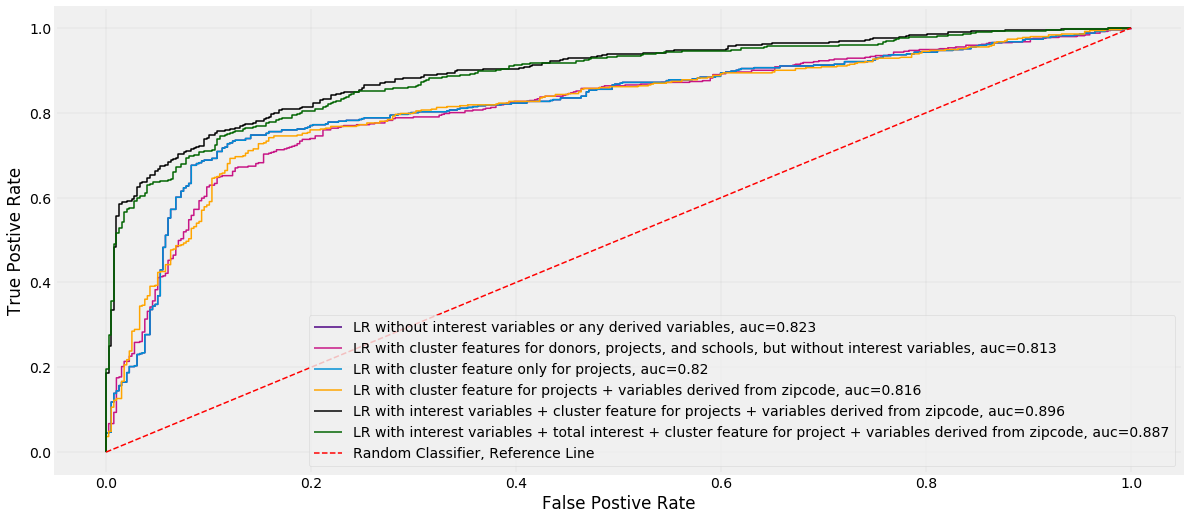

In [23]:
#XGB classifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

fig = plt.figure(figsize=(18,8), facecolor="w")
#Create general XGBoost model
model1 = LogisticRegression(random_state=0)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model1.fit(X_train1, y_train1)
pred1 = model1.predict_proba(X_test1)
y_pred1=pred1[:,1]
fprs1, tprs1, a1 = metrics.roc_curve(y_test1,  y_pred1)
auc1 = metrics.roc_auc_score(y_test1, y_pred1)
plt.plot(fprs1,tprs1,label="LR without interest variables or any derived variables, auc="+str(round(auc1, 3)), lw=1.5, c="indigo")

model2 = LogisticRegression(random_state=0)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model2.fit(X_train2, y_train2)
pred2 = model2.predict_proba(X_test2)
y_pred2=pred2[:,1]
fprs2, tprs2, a2= metrics.roc_curve(y_test2,  y_pred2)
auc2 = metrics.roc_auc_score(y_test2, y_pred2)
plt.plot(fprs2,tprs2,label="LR with cluster features for donors, projects, and schools, but without interest variables, auc="+str(round(auc2, 3)), lw=1.5, c="mediumvioletred")

model3 = LogisticRegression(random_state=0)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model3.fit(X_train3, y_train3)
pred3 = model3.predict_proba(X_test3)
y_pred3=pred3[:,1]
fprs3, tprs3, a3 = metrics.roc_curve(y_test3,  y_pred3)
auc3 = metrics.roc_auc_score(y_test3, y_pred3)
plt.plot(fprs1,tprs1,label="LR with cluster feature only for projects, auc="+str(round(auc3, 3)), lw=1.5)

model4 = LogisticRegression(random_state=0)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model4.fit(X_train4, y_train4)
pred4 = model4.predict_proba(X_test4)
y_pred4=pred4[:,1]
fprs4, tprs4, a4 = metrics.roc_curve(y_test4,  y_pred4)
auc4 = metrics.roc_auc_score(y_test4, y_pred4)
plt.plot(fprs4,tprs4,label="LR with cluster feature for projects + variables derived from zipcode, auc="+str(round(auc4,3)), lw=1.5, c="orange")

model5 = LogisticRegression(random_state=0)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model5.fit(X_train5, y_train5)
pred5 = model5.predict_proba(X_test5)
y_pred5=pred5[:,1]
fprs5, tprs5, a5 = metrics.roc_curve(y_test5,  y_pred5)
auc5 = metrics.roc_auc_score(y_test5, y_pred5)
plt.plot(fprs5,tprs5,label="LR with interest variables + cluster feature for projects + variables derived from zipcode, auc="+str(round(auc5, 3)), lw=1.5, c="black")

model6 = LogisticRegression(random_state=0)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model6.fit(X_train6, y_train6)
pred6 = model6.predict_proba(X_test6)
y_pred6=pred6[:,1]
fprs6, tprs6, a6 = metrics.roc_curve(y_test6,  y_pred6)
auc6 = metrics.roc_auc_score(y_test6, y_pred6)
plt.plot(fprs6,tprs6,label="LR with interest variables + total interest + cluster feature for project + variables derived from zipcode, auc="+str((round(auc6, 3))), lw=1.5, c="darkgreen")
plt.grid(linestyle='-', linewidth='0.1', color='gray')
plt.plot([0, 1], [0, 1], color='red', lw=1.5, linestyle='--', label="Random Classifier, Reference Line")
plt.legend(loc=4)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()

#Accuracy
#print("Accuracy : {}".format( (tp + tn) / (tp + tn + fp + fn) ))
#print("Precision: {}".format( tp / (tp + fp) ))
#print("Recall   : {}".format( tp / (tp + fn) ))

In [0]:
#SVM classifier linear kernel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
fig = plt.figure(figsize=(18,8), facecolor="w")
#Create general XGBoost model
model1 = SVC(kernel="linear",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model1.fit(X_train1, y_train1)
pred1 = model1.predict_proba(X_test1)
y_pred1=pred1[:,1]
fprs1, tprs1, a1 = metrics.roc_curve(y_test1,  y_pred1)
auc1 = metrics.roc_auc_score(y_test1, y_pred1)
plt.plot(fprs1,tprs1,label="SVM without interest variables or any derived variables, auc="+str(round(auc1,3)), lw=1.5, c="indigo")

model2 = SVC(kernel="linear",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model2.fit(X_train2, y_train2)
pred2 = model2.predict_proba(X_test2)
y_pred2=pred2[:,1]
fprs2, tprs2, a2= metrics.roc_curve(y_test2,  y_pred2)
auc2 = metrics.roc_auc_score(y_test2, y_pred2)
plt.plot(fprs2,tprs2,label="SVM with cluster features for donors, projects, and schools, but without interest variables, auc="+str(round(auc2, 3)), lw=1.5, c="mediumvioletred")

model3 = SVC(kernel="linear",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model3.fit(X_train3, y_train3)
pred3 = model3.predict_proba(X_test3)
y_pred3=pred3[:,1]
fprs3, tprs3, a3 = metrics.roc_curve(y_test3,  y_pred3)
auc3 = metrics.roc_auc_score(y_test3, y_pred3)
plt.plot(fprs1,tprs1,label="SVM with cluster feature only for projects, auc="+str(round(auc3,3)), lw=1.5)

model4 = SVC(kernel="linear",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model4.fit(X_train4, y_train4)
pred4 = model4.predict_proba(X_test4)
y_pred4=pred4[:,1]
fprs4, tprs4, a4 = metrics.roc_curve(y_test4,  y_pred4)
auc4 = metrics.roc_auc_score(y_test4, y_pred4)
plt.plot(fprs4,tprs4,label="SVM with cluster feature for projects + variables derived from zipcode, auc="+str(round(auc4, 3)), lw=1.5, c="orange")

model5 = SVC(kernel="linear",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model5.fit(X_train5, y_train5)
pred5 = model5.predict_proba(X_test5)
y_pred5=pred5[:,1]
fprs5, tprs5, a5 = metrics.roc_curve(y_test5,  y_pred5)
auc5 = metrics.roc_auc_score(y_test5, y_pred5)
plt.plot(fprs5,tprs5,label="SVM with interest variables + cluster feature for projects + variables derived from zipcode, auc="+str(round(auc5, 3)), lw=1.5, c="black")

model6 = SVC(kernel="linear",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model6.fit(X_train6, y_train6)
pred6 = model6.predict_proba(X_test6)
y_pred6=pred6[:,1]
fprs6, tprs6, a6 = metrics.roc_curve(y_test6,  y_pred6)
auc6 = metrics.roc_auc_score(y_test6, y_pred6)
plt.plot(fprs6,tprs6,label="SVM with interest variables + total interest + cluster feature for project + variables derived from zipcode, auc="+str(round(auc6, 3)), lw=1.5, c="darkgreen")
plt.grid(linestyle='-', linewidth='0.1', color='gray')
plt.plot([0, 1], [0, 1], color='red', lw=1.5, linestyle='--', label="Random Classifier, Reference Line")
plt.legend(loc=4)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()

#Accuracy
#print("Accuracy : {}".format( (tp + tn) / (tp + tn + fp + fn) ))
#print("Precision: {}".format( tp / (tp + fp) ))
#print("Recall   : {}".format( tp / (tp + fn) ))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

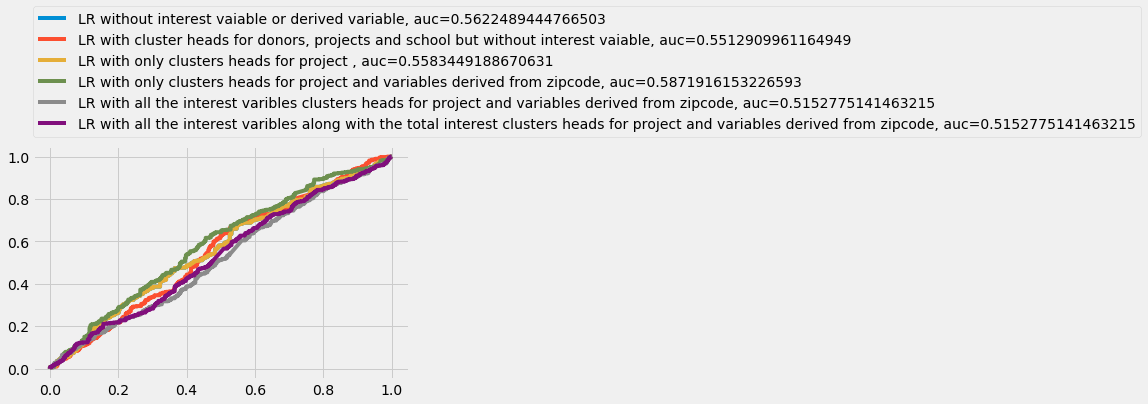

NameError: ignored

In [0]:
#SVM RBF kernel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
#Create general XGBoost model
model1 = SVC(kernel="rbf",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model1.fit(X_train1, y_train1)
pred1 = model1.predict_proba(X_test1)
y_pred1=pred1[:,1]
fprs1, tprs1, a1 = metrics.roc_curve(y_test1,  y_pred1)
auc1 = metrics.roc_auc_score(y_test1, y_pred1)
plt.plot(fprs1,tprs1,label="LR without interest vaiable or derived variable, auc="+str(auc1))

model2 = SVC(kernel="rbf",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model2.fit(X_train2, y_train2)
pred2 = model2.predict_proba(X_test2)
y_pred2=pred2[:,1]
fprs2, tprs2, a2= metrics.roc_curve(y_test2,  y_pred2)
auc2 = metrics.roc_auc_score(y_test2, y_pred2)
plt.plot(fprs2,tprs2,label="LR with cluster heads for donors, projects and school but without interest vaiable, auc="+str(auc2))

model3 = SVC(kernel="rbf",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model3.fit(X_train3, y_train3)
pred3 = model3.predict_proba(X_test3)
y_pred3=pred3[:,1]
fprs3, tprs3, a3 = metrics.roc_curve(y_test3,  y_pred3)
auc3 = metrics.roc_auc_score(y_test3, y_pred3)
plt.plot(fprs1,tprs1,label="LR with only clusters heads for project , auc="+str(auc3))

model4 = SVC(kernel="rbf",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model4.fit(X_train4, y_train4)
pred4 = model4.predict_proba(X_test4)
y_pred4=pred4[:,1]
fprs4, tprs4, a4 = metrics.roc_curve(y_test4,  y_pred4)
auc4 = metrics.roc_auc_score(y_test4, y_pred4)
plt.plot(fprs4,tprs4,label="LR with only clusters heads for project and variables derived from zipcode, auc="+str(auc4))

model5 = SVC(kernel="rbf",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model5.fit(X_train5, y_train5)
pred5 = model5.predict_proba(X_test5)
y_pred5=pred5[:,1]
fprs5, tprs5, a5 = metrics.roc_curve(y_test5,  y_pred5)
auc5 = metrics.roc_auc_score(y_test5, y_pred5)
plt.plot(fprs5,tprs5,label="LR with all the interest varibles clusters heads for project and variables derived from zipcode, auc="+str(auc5))

model6 = SVC(kernel="rbf",probability=True)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model6.fit(X_train6, y_train6)
pred6 = model6.predict_proba(X_test6)
y_pred6=pred6[:,1]
fprs6, tprs6, a6 = metrics.roc_curve(y_test6,  y_pred6)
auc6 = metrics.roc_auc_score(y_test6, y_pred6)
plt.plot(fprs6,tprs6,label="LR with all the interest varibles along with the total interest clusters heads for project and variables derived from zipcode, auc="+str(auc5))
plt.legend(loc=(0,1.04))
plt.show()

#Accuracy
print("Accuracy : {}".format( (tp + tn) / (tp + tn + fp + fn) ))
print("Precision: {}".format( tp / (tp + fp) ))
print("Recall   : {}".format( tp / (tp + fn) ))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d arr

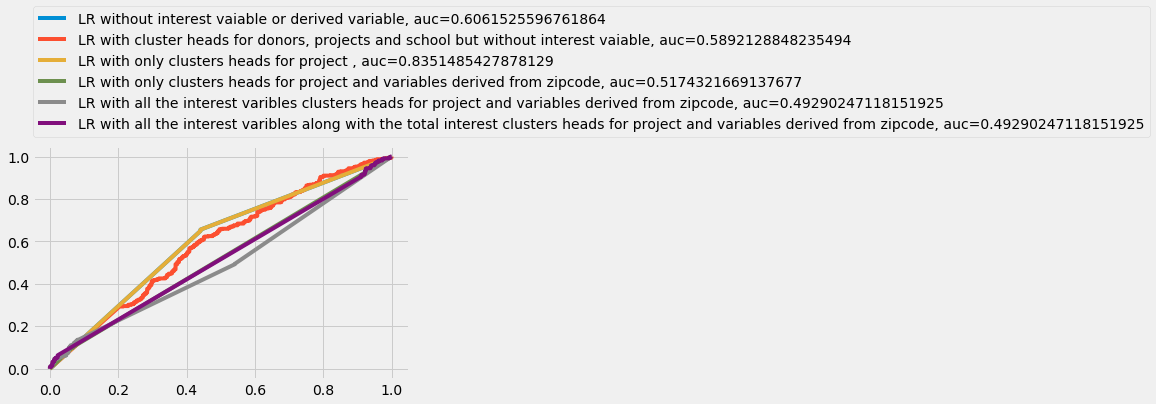

Accuracy : 0.741423125794155
Precision: 0.8405017921146953
Recall   : 0.5959339263024143


In [0]:
from sklearn.neural_network import MLPClassifier
#SVM RBF kernel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
#Create general XGBoost model
model1 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model1.fit(X_train1, y_train1)
pred1 = model1.predict_proba(X_test1)
y_pred1=pred1[:,1]
fprs1, tprs1, a1 = metrics.roc_curve(y_test1,  y_pred1)
auc1 = metrics.roc_auc_score(y_test1, y_pred1)
plt.plot(fprs1,tprs1,label="LR without interest vaiable or derived variable, auc="+str(auc1))

model2 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model2.fit(X_train2, y_train2)
pred2 = model2.predict_proba(X_test2)
y_pred2=pred2[:,1]
fprs2, tprs2, a2= metrics.roc_curve(y_test2,  y_pred2)
auc2 = metrics.roc_auc_score(y_test2, y_pred2)
plt.plot(fprs2,tprs2,label="LR with cluster heads for donors, projects and school but without interest vaiable, auc="+str(auc2))

model3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model3.fit(X_train3, y_train3)
pred3 = model3.predict_proba(X_test3)
y_pred3=pred3[:,1]
fprs3, tprs3, a3 = metrics.roc_curve(y_test3,  y_pred3)
auc3 = metrics.roc_auc_score(y_test3, y_pred3)
plt.plot(fprs1,tprs1,label="LR with only clusters heads for project , auc="+str(auc3))

model4 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model4.fit(X_train4, y_train4)
pred4 = model4.predict_proba(X_test4)
y_pred4=pred4[:,1]
fprs4, tprs4, a4 = metrics.roc_curve(y_test4,  y_pred4)
auc4 = metrics.roc_auc_score(y_test4, y_pred4)
plt.plot(fprs4,tprs4,label="LR with only clusters heads for project and variables derived from zipcode, auc="+str(auc4))

model5 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model5.fit(X_train5, y_train5)
pred5 = model5.predict_proba(X_test5)
y_pred5=pred5[:,1]
fprs5, tprs5, a5 = metrics.roc_curve(y_test5,  y_pred5)
auc5 = metrics.roc_auc_score(y_test5, y_pred5)
plt.plot(fprs5,tprs5,label="LR with all the interest varibles clusters heads for project and variables derived from zipcode, auc="+str(auc5))

model6 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model6.fit(X_train6, y_train6)
pred6 = model6.predict_proba(X_test6)
y_pred6=pred6[:,1]
fprs6, tprs6, a6 = metrics.roc_curve(y_test6,  y_pred6)
auc6 = metrics.roc_auc_score(y_test6, y_pred6)
plt.plot(fprs6,tprs6,label="with interest variables + total interest + cluster feature for project + variables derived from zipcode, auc="+str(auc5))
plt.legend(loc=(0,1.04))
plt.show()

#Accuracy
print("Accuracy : {}".format( (tp + tn) / (tp + tn + fp + fn) ))
print("Precision: {}".format( tp / (tp + fp) ))
print("Recall   : {}".format( tp / (tp + fn) ))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

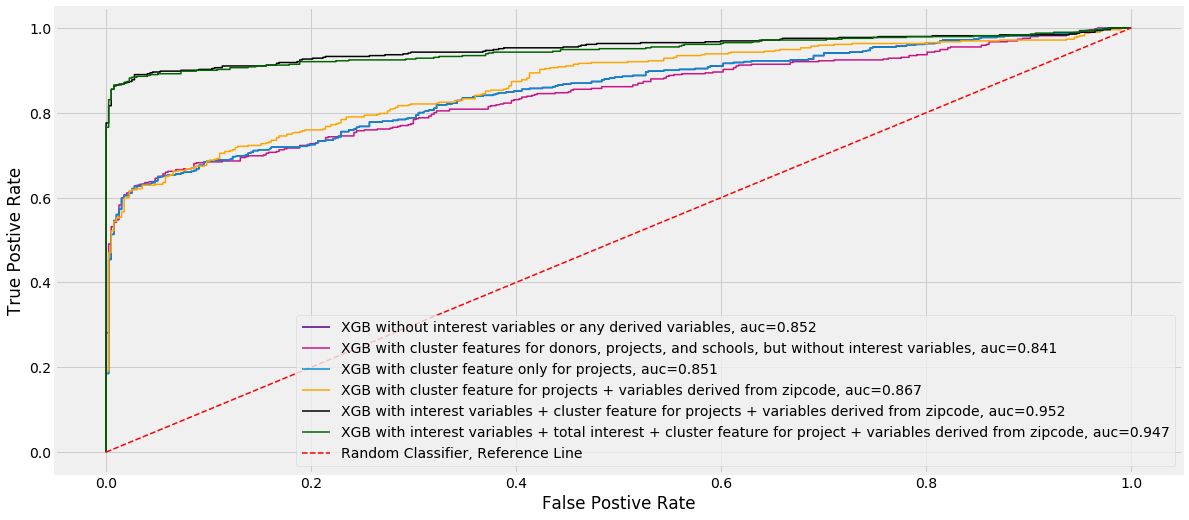

In [0]:
#XGB classifier
fig = plt.figure(figsize=(18,8), facecolor="w")
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
#Create general XGBoost model
model1 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model1.fit(X_train1, y_train1)
pred1 = model1.predict_proba(X_test1)
y_pred1=pred1[:,1]
fprs1, tprs1, a1 = metrics.roc_curve(y_test1,  y_pred1)
auc1 = metrics.roc_auc_score(y_test1, y_pred1)
plt.plot(fprs1,tprs1,label="XGB without interest variables or any derived variables, auc="+str(round(auc1, 3)), lw=1.5, c="indigo")

model2 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model2.fit(X_train2, y_train2)
pred2 = model2.predict_proba(X_test2)
y_pred2=pred2[:,1]
fprs2, tprs2, a2= metrics.roc_curve(y_test2,  y_pred2)
auc2 = metrics.roc_auc_score(y_test2, y_pred2)
plt.plot(fprs2,tprs2,label="XGB with cluster features for donors, projects, and schools, but without interest variables, auc="+str(round(auc2, 3)), lw=1.5, c="mediumvioletred")

model3 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model3.fit(X_train3, y_train3)
pred3 = model3.predict_proba(X_test3)
y_pred3=pred3[:,1]
fprs3, tprs3, a3 = metrics.roc_curve(y_test3,  y_pred3)
auc3 = metrics.roc_auc_score(y_test3, y_pred3)
plt.plot(fprs1,tprs1,label="XGB with cluster feature only for projects, auc="+str(round(auc3, 3)), lw=1.5)

model4 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model4.fit(X_train4, y_train4)
pred4 = model4.predict_proba(X_test4)
y_pred4=pred4[:,1]
fprs4, tprs4, a4 = metrics.roc_curve(y_test4,  y_pred4)
auc4 = metrics.roc_auc_score(y_test4, y_pred4)
plt.plot(fprs4,tprs4,label="XGB with cluster feature for projects + variables derived from zipcode, auc="+str(round(auc4, 3)), lw=1.5, c="orange")

model5 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model5.fit(X_train5, y_train5)
pred5 = model5.predict_proba(X_test5)
y_pred5=pred5[:,1]
fprs5, tprs5, a5 = metrics.roc_curve(y_test5,  y_pred5)
auc5 = metrics.roc_auc_score(y_test5, y_pred5)
plt.plot(fprs5,tprs5,label="XGB with interest variables + cluster feature for projects + variables derived from zipcode, auc="+str(round(auc5, 3)), lw=1.5, c="black")

model6 = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
#Default: max_depth=3, learning_rate=0.1, n_estimators=100
model6.fit(X_train6, y_train6)
pred6 = model6.predict_proba(X_test6)
y_pred6=pred6[:,1]
fprs6, tprs6, a6 = metrics.roc_curve(y_test6,  y_pred6)
auc6 = metrics.roc_auc_score(y_test6, y_pred6)
plt.plot(fprs6,tprs6,label="XGB with interest variables + total interest + cluster feature for project + variables derived from zipcode, auc="+str(round(auc6, 3)), lw=1.5, c="darkgreen")
plt.plot([0, 1], [0, 1], color='red', lw=1.5, linestyle='--', label="Random Classifier, Reference Line")
plt.legend(loc=4)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()

#Accuracy
#print("Accuracy : {}".format( (tp + tn) / (tp + tn + fp + fn) ))
#print("Precision: {}".format( tp / (tp + fp) ))
#print("Recall   : {}".format( tp / (tp + fn) ))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


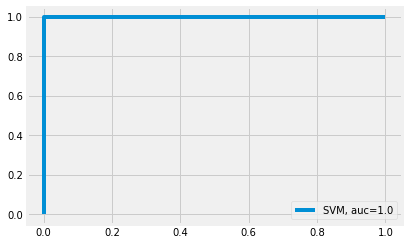

In [0]:
XGBClassifier

With clustering
Accuracy : 0.7382465057179162
Precision: 0.8295254833040422
Recall   : 0.5997458703939009

Without clustering
Accuracy : 0.7477763659466328
Precision: 0.8186274509803921
Recall   : 0.636594663278272

with project clustering
Accuracy : 0.7445997458703939
Precision: 0.8235294117647058
Recall   : 0.6226175349428208

with zip parameters: 
Accuracy : 0.741423125794155
Precision: 0.8405017921146953
Recall   : 0.5959339263024143

In [0]:
# Code here
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
name=X_train.columns

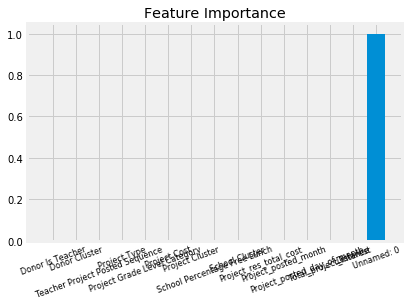

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# Calculate feature importances
importances = clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)
names = [name[i] for i in indices]
# Rearrange feature names so they match the sorted feature importances
#names = [X_train.feature_names[i] for i in indices]

# Barplot: Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()
# Code here

